In [1]:
import os
import torch
from torch import nn
from torchvision.transforms import v2
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from helpers import get_files_in_dir
from torchvision.io import read_image

from embed import PatchEmbedding


In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [3]:
# to 10x10x10
# nn.Conv2d(3, 10, 10, stride=10, padding=0)

# to 10x9x9
# nn.Conv2d(3, 10, 15, stride=10, padding=0)
from helpers import draw_random_triangle
triangle = draw_random_triangle(128,(1,5))
# random tensor 3x32x32
triangle = torch.rand(1,3, 64, 64)
# from 3x100x100 to 3x20x20
c1 = nn.Conv2d(3, 8, 2, stride=2, padding=0)
#m1 = nn.Conv2d(8,3,1 ,stride=1, bias=False)

#triangle_tensor = torch.tensor(triangle).permute(2, 0, 1).unsqueeze(0).float()
triangle_tensor = triangle
triangle_tensor = c1(triangle_tensor)

print(triangle_tensor.shape)
print(triangle_tensor.flatten().shape)

# triangle_tensor = m1(triangle_tensor)
# print(triangle_tensor.shape)
# print(triangle_tensor.flatten().shape)


# # visualize
# triangle_tensor = triangle_tensor.squeeze(0)[0:3]
# triangle_tensor = triangle_tensor.permute(1, 2, 0)
# plt.imshow(triangle_tensor.detach().numpy())


torch.Size([1, 8, 32, 32])
torch.Size([8192])


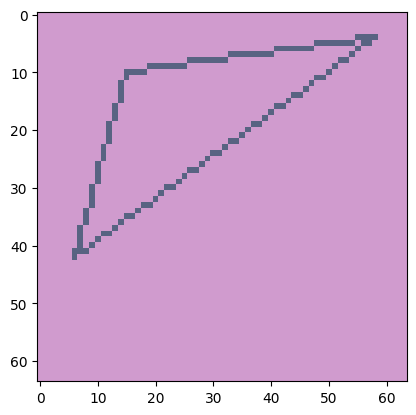

torch.Size([3, 64, 64])
torch.Size([3, 2, 64, 32])
torch.Size([3, 2, 2, 32, 32])
torch.Size([3, 4, 32, 32])


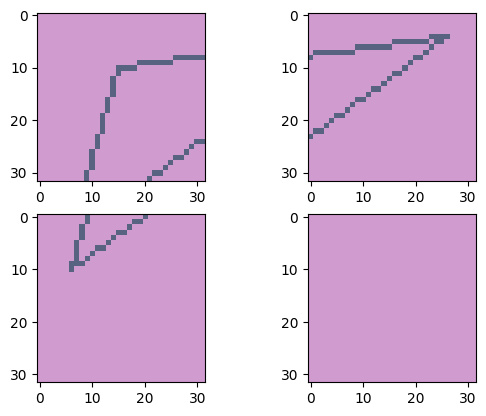

In [4]:
# random tensor of 5x3x64x64
# 5 images, 3 channels, 64x64
from helpers import draw_random_triangle
triangle = draw_random_triangle(64,(1,3))
# visualize triangle
plt.imshow(triangle)
plt.show()

random_tensor = torch.tensor(triangle).permute(2, 0, 1)
print(random_tensor.shape)
random_tensor = random_tensor.unfold(1, 32, 32)
print(random_tensor.shape)
random_tensor = random_tensor.unfold(2, 32, 32)
print(random_tensor.shape)
random_tensor = random_tensor.reshape(3,4,32,32)
print(random_tensor.shape) # 3x4x32x32



# visualize
random_tensor = random_tensor.permute(1,2,3,0)
chunk1 = random_tensor[0]
chunk2 = random_tensor[1]
chunk3 = random_tensor[2]
chunk4 = random_tensor[3]

# visualize all chunks in a grid
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(chunk1)
axs[0, 1].imshow(chunk2)
axs[1, 0].imshow(chunk3)
axs[1, 1].imshow(chunk4)
plt.show()




In [5]:
# 32x17x100
dum = torch.rand(32,17,100)
p1 = torch.rand(32,100)
p2 = torch.rand(32,100)

dp = dum.permute(1,0,2)
dp.shape


torch.Size([17, 32, 100])

In [20]:
from figures_dataset import FiguresData
train_dataset = FiguresData(128,1500, augment=True)
print("Training ponits: ",len(train_dataset))

valid_dataset = FiguresData(128,300, augment=False)
print("Validation ponits: ",len(valid_dataset))


Training ponits:  1500
Validation ponits:  300


tensor(1, device='cuda:0')


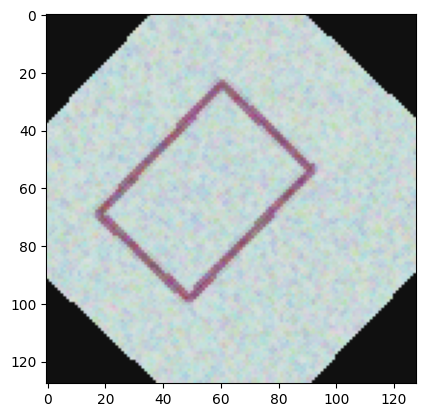

tensor(0, device='cuda:0')


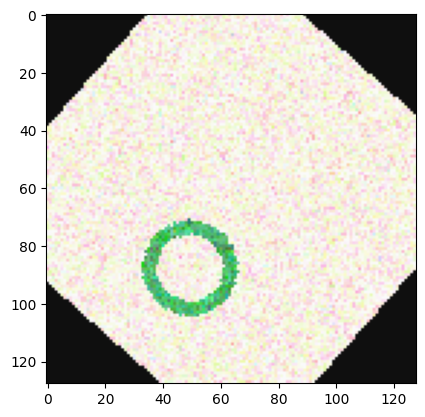

tensor(3, device='cuda:0')


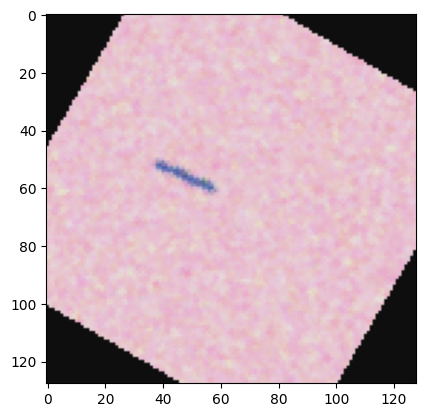

tensor(3, device='cuda:0')


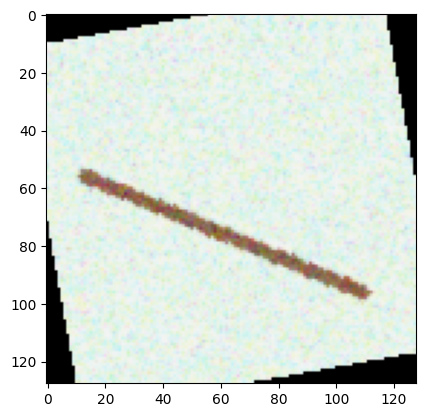

tensor(3, device='cuda:0')


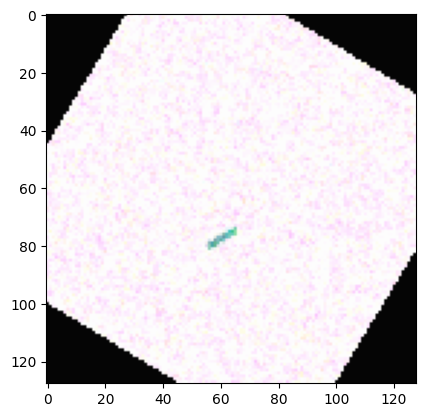

In [22]:
#terate training_set and visualize 
for i in range(5):
    # random int 
    j = torch.randint(0, len(train_dataset),(1,)).item() 
    print(train_dataset[j][1])
    plt.imshow(train_dataset[j][0].permute(1, 2, 0).to('cpu'))
    plt.show()

In [23]:
# TRAINING IMPORTS
from torch import nn
import torch.optim as optim
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from torcheval.metrics.functional import multiclass_accuracy
from torch.nn import CrossEntropyLoss

In [36]:
# TRAINING LOOP
model = tit(classes=5)
model = model.to(device)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True)

In [37]:
for i, batch in zip(range(len(train_loader)),train_loader):
    images, labels = batch
    with torch.no_grad():   
        ret = model(images.to(device))
        print(ret.shape)
    break

torch.Size([32, 5])


In [15]:
import numpy as np
d = np.zeros((2,3,128,128))
d = torch.tensor(d, dtype=torch.float32)
model(d.cuda())

tensor([[[ 0.4100, -1.1230, -1.6440,  ..., -0.5031,  0.2680,  0.1264],
         [-0.9666, -1.6117, -1.6508,  ...,  1.2076, -1.4667, -0.0031],
         [-0.9666, -1.6117, -1.6508,  ...,  1.2076, -0.0000, -0.0031],
         ...,
         [-0.0000, -1.6117, -1.6508,  ...,  0.0000, -1.4667, -0.0031],
         [-0.9666, -1.6117, -1.6508,  ...,  1.2076, -1.4667, -0.0031],
         [-0.9666, -1.6117, -1.6508,  ...,  1.2076, -1.4667, -0.0031]],

        [[ 0.4100, -1.1230, -0.0000,  ..., -0.0000,  0.2680,  0.1264],
         [-0.0000, -1.6117, -1.6508,  ...,  1.2076, -1.4667, -0.0031],
         [-0.9666, -1.6117, -1.6508,  ...,  1.2076, -1.4667, -0.0031],
         ...,
         [-0.0000, -1.6117, -1.6508,  ...,  1.2076, -0.0000, -0.0031],
         [-0.9666, -1.6117, -0.0000,  ...,  1.2076, -1.4667, -0.0031],
         [-0.9666, -0.0000, -1.6508,  ...,  0.0000, -1.4667, -0.0031]]],
       device='cuda:0', grad_fn=<NativeDropoutBackward0>)

In [30]:
ps = 0
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Weights: {param.numel()} \n")
    param.requires_grad_ = True
    ps += param.numel()
print("All params: ",ps)

Layer: patch_embed.pos_embed | Size: torch.Size([1, 17, 50]) | Weights: 850 

Layer: patch_embed.cls_token | Size: torch.Size([50]) | Weights: 50 

Layer: patch_embed.patch_embed.0.weight | Size: torch.Size([3072]) | Weights: 3072 

Layer: patch_embed.patch_embed.0.bias | Size: torch.Size([3072]) | Weights: 3072 

Layer: patch_embed.patch_embed.1.weight | Size: torch.Size([50, 3072]) | Weights: 153600 

Layer: patch_embed.patch_embed.1.bias | Size: torch.Size([50]) | Weights: 50 

Layer: patch_embed.patch_embed.2.weight | Size: torch.Size([50]) | Weights: 50 

Layer: patch_embed.patch_embed.2.bias | Size: torch.Size([50]) | Weights: 50 

Layer: process_patch1.1.weight | Size: torch.Size([40, 50]) | Weights: 2000 

Layer: process_patch1.1.bias | Size: torch.Size([40]) | Weights: 40 

Layer: process_patch1.3.weight | Size: torch.Size([30, 40]) | Weights: 1200 

Layer: process_patch1.3.bias | Size: torch.Size([30]) | Weights: 30 

Layer: process_patch1.5.weight | Size: torch.Size([25, 30]

In [41]:

ps = 0
for name, param in model.named_parameters():
    #print(f"Layer: {name} | Size: {param.size()} \n")
    param.requires_grad_ = True
    ps += param.numel()
    

epochs = 128
step_size=10
lr = 0.001

optimizer = optim.AdamW(model.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)
optimizer.zero_grad()
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=0.3) #learning rate decay
criterion = CrossEntropyLoss()
iter_num = 0

lowest_loss = 999
valid_loss = 900
best_epoch = 0

epoch_pbar = tqdm(range(epochs))

print("Params to train: ",ps)

for epoch in epoch_pbar:
    train_dataset.new_augment()
    print('Epoch num {}'.format(epoch))
    model.train()
    train_loss = 0

    #batch_pbar = enumerate(tqdm(train_loader))
    #for i,batch in batch_pbar:
    for i, batch in zip(range(len(train_loader)),train_loader):
        images, labels = batch
        images = images.to(torch.float32)
        images = images.to(device)
        labels = labels.to(device)
        pred = model(images)

        
        loss =  criterion(pred,labels)
        #acc = multiclass_accuracy(pred, labels)
        #loss += ((1-acc)/2)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad(set_to_none=True)

        train_loss += loss.item()
        iter_num+=1

    train_loss /= (i+1)

    print('Epoch num {}| train loss {} | lr_opt {} \n'.format(epoch,round(train_loss, 4),optimizer.param_groups[0]['lr']))

    if (epoch == 0) or (epoch > 4 and epoch % 5 == 0):
        model.eval()
        valid_loss = 0
        valid_accuracy = 0
        with torch.no_grad():
            for i, batch in zip(range(len(valid_loader)),valid_loader):
                images, labels = batch
                images = images.to(torch.float32)
                images = images.to(device)
                labels = labels.to(device)
                pred = model(images)

                loss =  criterion(pred,labels)
                valid_loss += loss.item()
                valid_accuracy += multiclass_accuracy(pred, labels)

        valid_loss /= (i+1)
        valid_accuracy /= (i+1)

            
        print('Validation loss {} | Validation accuracy {}'.format(round(valid_loss, 4), round(valid_accuracy.item(), 4)))

    

    if(epoch == 0):
        lowest_loss = valid_loss
    

    if (valid_loss + 0.01) < lowest_loss:
        lowest_loss = valid_loss
        best_epoch = epoch
        #print('New lowest loss: {} at epoch {}'.format(round(lowest_loss, 4), best_epoch))
    
    # elif epoch>20 and epoch - best_epoch > 8:
    #     print('Early stopping at epoch {}. Best epoch: {} with score {} '.format(epoch, best_epoch, lowest_loss))
    #     break 
    
    # change schedulers step size

    scheduler.step_size = step_size + (epoch//5)
    
    scheduler.step()


print('Finished. Best epoch: {} with score {} '.format(best_epoch, lowest_loss))


  0%|          | 0/128 [00:00<?, ?it/s]

Params to train:  229799
Epoch num 0
Epoch num 0| train loss 0.4893 | lr_opt 0.001 

Validation loss 0.6718 | Validation accuracy 0.7698
Epoch num 1
Epoch num 1| train loss 0.4619 | lr_opt 0.001 

Epoch num 2
Epoch num 2| train loss 0.4735 | lr_opt 0.001 

Epoch num 3
Epoch num 3| train loss 0.4403 | lr_opt 0.001 

Epoch num 4
Epoch num 4| train loss 0.5145 | lr_opt 0.001 

Epoch num 5
Epoch num 5| train loss 0.4543 | lr_opt 0.001 

Validation loss 0.4871 | Validation accuracy 0.8052
Epoch num 6
Epoch num 6| train loss 0.4898 | lr_opt 0.001 

Epoch num 7
Epoch num 7| train loss 0.4704 | lr_opt 0.001 

Epoch num 8
Epoch num 8| train loss 0.4504 | lr_opt 0.001 

Epoch num 9
Epoch num 9| train loss 0.4683 | lr_opt 0.001 

Epoch num 10
Epoch num 10| train loss 0.4456 | lr_opt 0.001 

Validation loss 0.6705 | Validation accuracy 0.7625
Epoch num 11
Epoch num 11| train loss 0.4878 | lr_opt 0.001 

Epoch num 12
Epoch num 12| train loss 0.4164 | lr_opt 0.0003 

Epoch num 13
Epoch num 13| train

In [27]:
model.eval()
model.cpu()
del(model)

RuntimeError: Given normalized_shape=[605], expected input with shape [*, 605], but got input of size[5, 121]

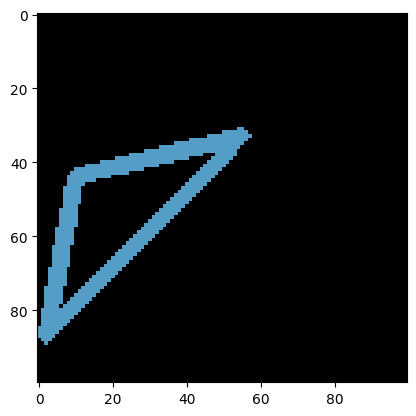

In [20]:
# make random triangle
from helpers import draw_random_triangle
crit = nn.CrossEntropyLoss()
model.cpu()
triangle1 = draw_random_triangle(100,(1,5))
# visualize triangle
plt.imshow(triangle)
# use model to predict triangle
triangle_tensor1 = torch.tensor(triangle1).permute(2, 0, 1).float()
# triangle2 = draw_random_triangle(100,(1,5))
# triangle_tensor2 = torch.tensor(triangle1).permute(2, 0, 1).float()

# # make mini-batch of triangles
# batch = torch.stack([triangle_tensor1,triangle_tensor2])
with torch.no_grad():    
    pred = model(triangle_tensor1)
    

print(pred)
# calculate loss
target = torch.tensor([4])
loss = crit(pred, target)
print(loss)



In [16]:
dummy = torch.rand(32,17,50)
l = nn.Linear(50,50, bias=True)
dummy = l(dummy)
dummy.shape

torch.Size([32, 17, 50])

In [20]:
from embed import PatchEmbedding
p_embed = PatchEmbedding(config)
p_embed(torch.rand(1,3,128,128)).shape

torch.Size([1, 17, 100])

In [62]:
sizes = [int(50*(0.8**i)) for i in range(10)]
sizes
a = [i for i in range(50,15, -int((50-15)/10)) ]
a[0:10]

[50, 47, 44, 41, 38, 35, 32, 29, 26, 23]

In [7]:
from tit import tit

model = tit(patch_pipe_root_forks = [2,2,2,2], patch_size = 32)

s = 0
for n,param in model.named_parameters():
    s+= param.numel()
    #print(n)

print("params: ",s)
# dummy img batch: 32x3x124x124
dummy_img = torch.rand(32,3,128,128)

r = model(dummy_img)
len(r)

params:  299768


16

In [18]:
r[0].shape

torch.Size([32, 65, 15])